In [1]:
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [2]:
data_1 = np.loadtxt("trq_data_1.txt")

In [3]:
data_1

array([[ 5.92443725e+01,  5.06453762e+01,  1.06100000e+03, ...,
         1.62367859e-02,  1.00000000e+00, -1.36126361e+00],
       [ 5.95307964e+01,  4.96021185e+01,  1.04300000e+03, ...,
         1.47879217e-02,  1.00000000e+00, -2.74326329e+00],
       [ 5.86598982e+01,  5.19632474e+01,  1.13500000e+03, ...,
         1.12923220e-02,  1.00000000e+00, -2.87351085e+00],
       ...,
       [-7.36711689e+01,  4.66849043e+01,  9.44000000e+02, ...,
        -2.05314078e-02,  4.00000000e+00, -1.62031909e+00],
       [-9.75397862e+01,  4.56169091e+01,  9.07000000e+02, ...,
        -1.92335684e-02,  4.00000000e+00, -1.65377528e+00],
       [-1.22599962e+02,  4.45690019e+01,  8.52000000e+02, ...,
        -1.77211495e-02,  4.00000000e+00, -2.13675665e+00]])

In [4]:
data_2 = np.loadtxt("trq_data_2.txt")

In [5]:
data_2

array([[ 3.31130836e+02,  5.50441103e+01,  1.17600000e+03, ...,
         1.58202070e-02,  2.00000000e+00, -3.95003229e-01],
       [ 3.34914894e+02,  6.15880615e+01,  1.39300000e+03, ...,
         2.33559493e-02,  2.00000000e+00, -9.38480750e-01],
       [ 2.37702052e+02,  6.28104941e+01,  1.52400000e+03, ...,
         7.62588230e-03,  2.00000000e+00, -1.89549179e+00],
       ...,
       [-3.64090254e+01,  4.19053577e+01,  7.39000000e+02, ...,
        -1.93050776e-02,  1.00000000e+00,  2.38516446e+00],
       [-3.00209416e+01,  4.15404787e+01,  7.22000000e+02, ...,
        -1.75737925e-02,  1.00000000e+00,  1.01634614e+00],
       [-3.00275815e+01,  4.23669173e+01,  7.27000000e+02, ...,
        -9.98899309e-03,  1.00000000e+00, -2.80736531e-01]])

In [6]:
data = np.concatenate(([data_1],[data_2]), axis=1)

In [7]:
print(len(data_1), len(data_2))

348 1142


In [8]:
data_1.shape

(348, 9)

In [9]:
data_2.shape

(1142, 9)

In [10]:
data.shape

(1, 1490, 9)

In [11]:
data

array([[[ 5.92443725e+01,  5.06453762e+01,  1.06100000e+03, ...,
          1.62367859e-02,  1.00000000e+00, -1.36126361e+00],
        [ 5.95307964e+01,  4.96021185e+01,  1.04300000e+03, ...,
          1.47879217e-02,  1.00000000e+00, -2.74326329e+00],
        [ 5.86598982e+01,  5.19632474e+01,  1.13500000e+03, ...,
          1.12923220e-02,  1.00000000e+00, -2.87351085e+00],
        ...,
        [-3.64090254e+01,  4.19053577e+01,  7.39000000e+02, ...,
         -1.93050776e-02,  1.00000000e+00,  2.38516446e+00],
        [-3.00209416e+01,  4.15404787e+01,  7.22000000e+02, ...,
         -1.75737925e-02,  1.00000000e+00,  1.01634614e+00],
        [-3.00275815e+01,  4.23669173e+01,  7.27000000e+02, ...,
         -9.98899309e-03,  1.00000000e+00, -2.80736531e-01]]])

In [12]:
data = np.squeeze(data)

In [13]:
data.shape

(1490, 9)

In [14]:
torque = data.T[0]
data = data[:,1:]
features = ["diesel_model", "rpm", "speed", "acceleration", "intake_pressure", "rolling_inclination", "gear", "lat_acc"]

In [15]:
std_scaler = preprocessing.StandardScaler()

In [16]:
data = std_scaler.fit_transform(data)

In [17]:
print(np.mean(data), np.std(data))

5.245617512322887e-17 1.0


In [18]:
data.shape

(1490, 8)

In [19]:
torque.shape

(1490,)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data,torque,test_size=0.2,random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1192, 8)
(298, 8)
(1192,)
(298,)


In [22]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_predictions = lr.predict(X_test)
lr_mse = mean_squared_error(y_test,lr_predictions)
print(round(lr_mse,3))

15278.639


In [23]:
parameters = {
              'n_estimators': 1500, 
              'max_depth': 4, 
              'min_samples_split': 2,
              'learning_rate': 0.01, 
              'loss': 'ls'
             }

In [24]:
gb = GradientBoostingRegressor(**parameters)
gb.fit(X_train,y_train)
gb_predictions = gb.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print(round(gb_mse,3))

2524.098


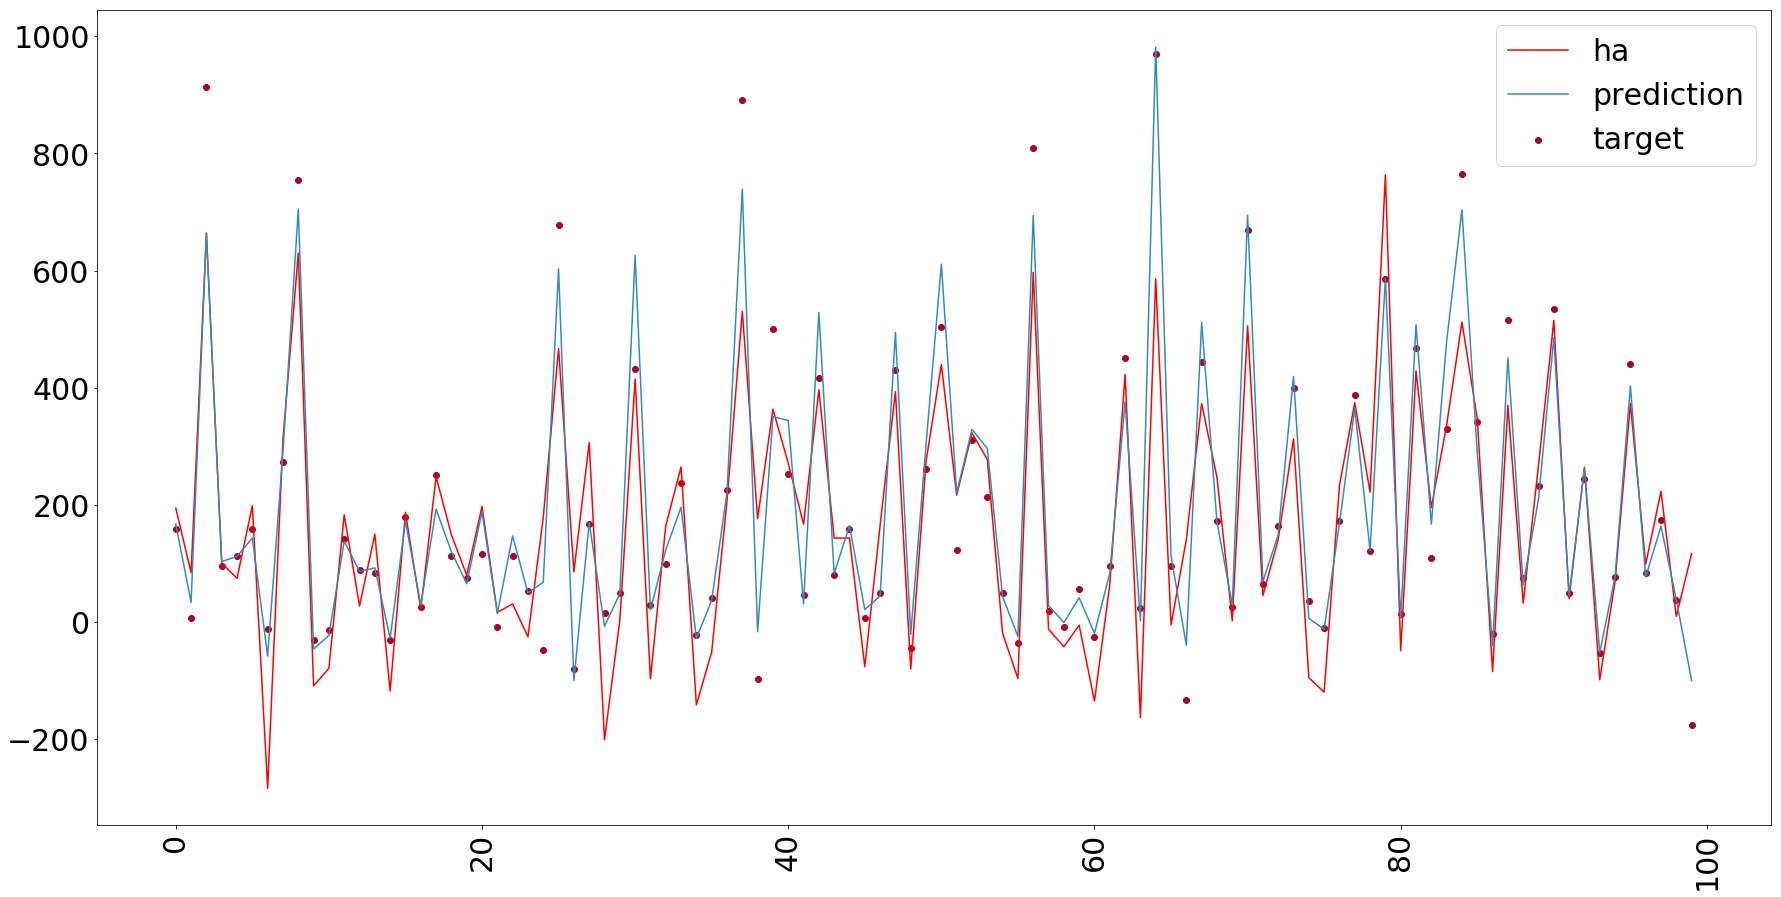

In [39]:
plt.rcParams['figure.figsize'] = [30,15]
plt.rcParams['legend.fontsize'] =  30

size = 100

plt.plot(gb_predictions[:size], c='#348ABD',label='prediction')
plt.scatter(range(size),y_test[:size],c='#A60628',label='target')
plt.legend()
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30)
plt.show()

In [26]:
test_score = [gb.loss_(y_test, y_pred) for y_pred in gb.staged_predict(X_test)]
print(len(test_score))
print(len(gb.train_score_))

1500
1500


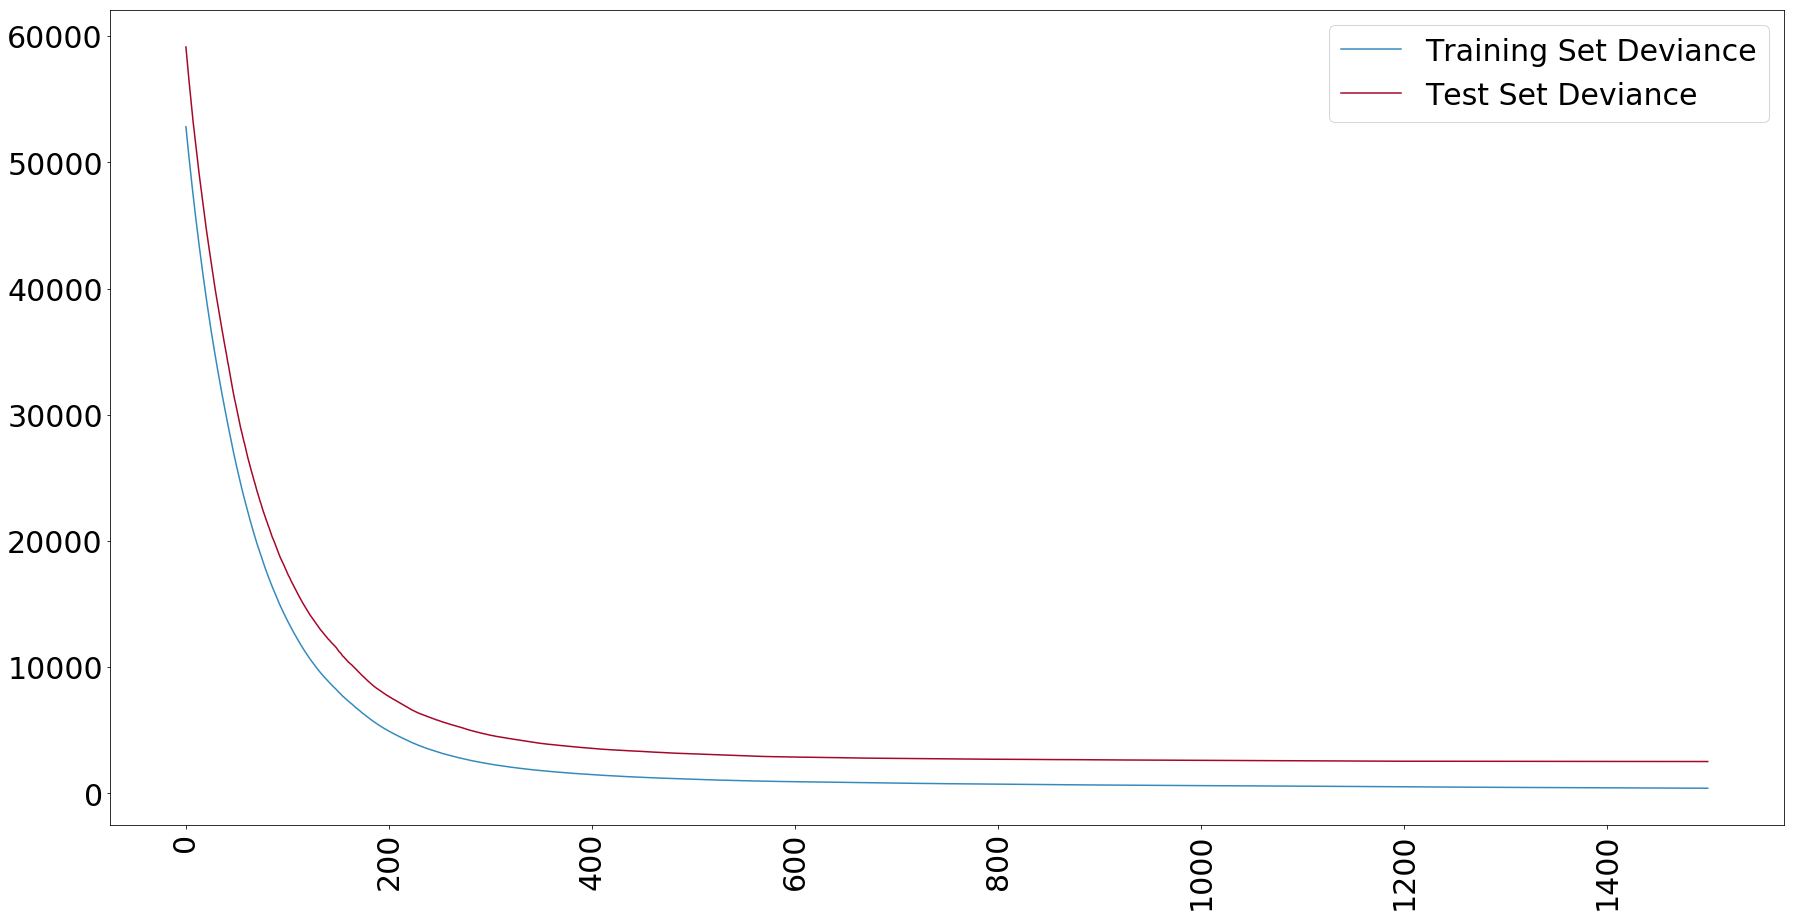

In [27]:
plt.plot(range(parameters['n_estimators']), gb.train_score_, c='#348ABD',
         label='Training Set Deviance')
plt.plot(range(parameters['n_estimators']), test_score, c='#A60628',
         label='Test Set Deviance')
plt.legend()
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30)
plt.show()

In [28]:
feature_importance = gb.feature_importances_
feature_importance = 100*(feature_importance/feature_importance.max())
print(feature_importance)
sorted_idx = np.argsort(feature_importance)
print(sorted_idx)
more_important = [features[i] for i in sorted_idx]    
print(more_important)

[  1.45360715   7.19109343 100.          68.91108879   1.59893933
  96.72421585   2.96293942   0.86191679]
[7 0 4 6 1 3 5 2]
['lat_acc', 'diesel_model', 'intake_pressure', 'gear', 'rpm', 'acceleration', 'rolling_inclination', 'speed']


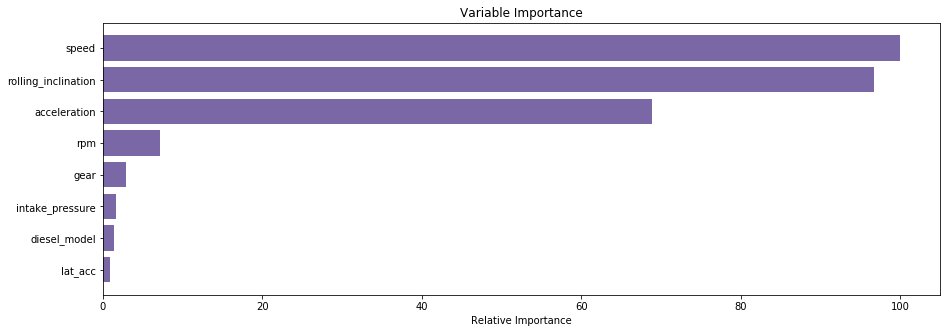

In [29]:
plt.rcParams['figure.figsize'] = [15,5]

plt.figure()
plt.barh(np.arange(len(feature_importance)), feature_importance[sorted_idx], align='center', color='#7A68A6')
plt.yticks(np.arange(len(feature_importance)), more_important)
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [30]:
import pickle

In [33]:
filename = 'finalized_model.sav'
pickle.dump(lr, open(filename, 'wb'))

In [40]:
from sklearn.externals import joblib
joblib.dump(lr, filename)

['finalized_model.sav']

In [41]:
X_test

array([[ 1.4403936 ,  1.69312703, -0.76030784, ...,  0.51872396,
        -1.10770622, -0.15752552],
       [-0.20084979, -0.30924061,  0.53114072, ..., -1.48734058,
         1.25012559, -0.2586108 ],
       [-2.46439145, -0.33229418,  1.15841574, ...,  3.73911894,
         1.25012559,  0.30006458],
       ...,
       [-1.37682773, -0.16103906,  1.2322128 , ..., -0.48209071,
         1.25012559,  0.05368684],
       [ 0.69781768, -0.00625077, -0.87100343, ...,  1.45636225,
        -1.10770622, -0.38798588],
       [-0.07202626, -1.25443717,  0.08835836, ..., -0.43003435,
         1.25012559,  0.26337821]])